In [77]:
import pandas as pd
import scipy as sc
from scipy.stats import norm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 6)
plt.style.use('ggplot')

In [78]:
# ozone units (ppm)
ozonezip = pd.read_csv(
    'ozonebyzip.csv', 
    index_col=['Date', 'COUNTY', 'zip'],
    parse_dates=["Date"]
)

ozonezip = ozonezip[['Daily Max 8-hour Ozone Concentration', 'DAILY_AQI_VALUE']].groupby(ozonezip.index).mean()
# pm2.5 unit (ug/m3 LC)
pm25ip = pd.read_csv(
    'pm25byzip.csv', 
    index_col=['Date', 'COUNTY', 'zip'],
    parse_dates=["Date"]
)

pm25ip = pm25ip[['Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE']].groupby(pm25ip.index).mean()

asthmacountyzip = pd.read_csv('asthmacountyzip-Copy1.csv')

In [79]:
merge = ozonezip.join(pm25ip, lsuffix='_ozone')
merge

,Daily Max 8-hour Ozone Concentration,DAILY_AQI_VALUE_ozone,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
"(2015-01-01 00:00:00, Los Angeles, 90012)",0.038,35.0,25.25,79.0
"(2015-01-01 00:00:00, Los Angeles, 90073)",0.036,33.0,NaN,NaN
"(2015-01-01 00:00:00, Los Angeles, 90221)",0.029,27.0,NaN,NaN
"(2015-01-01 00:00:00, Los Angeles, 90293)",0.034,31.0,NaN,NaN
"(2015-01-01 00:00:00, Los Angeles, 90660)",0.038,35.0,NaN,NaN
...,...,...,...,...
"(2018-12-30 00:00:00, Ventura, 00000)",0.037,34.0,2.10,9.0
"(2018-12-30 00:00:00, Ventura, 91360)",0.035,32.0,7.70,32.0
"(2018-12-30 00:00:00, Ventura, 93023)",0.035,32.0,7.10,30.0
"(2018-12-30 00:00:00, Ventura, 93036)",0.033,31.0,2.20,9.0


In [80]:
merge2 = merge.set_index(pd.MultiIndex.from_tuples(merge.index, names=['Date', 'COUNTY', 'zip'])).reset_index()
merge2.info()
merge2 = merge2[merge2.zip != "00000"]
merge2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71648 entries, 0 to 71647
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date                                  71648 non-null  datetime64[ns]
 1   COUNTY                                71648 non-null  object        
 2   zip                                   71648 non-null  object        
 3   Daily Max 8-hour Ozone Concentration  71648 non-null  float64       
 4   DAILY_AQI_VALUE_ozone                 71648 non-null  float64       
 5   Daily Mean PM2.5 Concentration        39768 non-null  float64       
 6   DAILY_AQI_VALUE                       39768 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.8+ MB


,Date,COUNTY,zip,Daily Max 8-hour Ozone Concentration,DAILY_AQI_VALUE_ozone,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
0,2015-01-01,Los Angeles,90012,0.038,35.0,25.25,79.0
1,2015-01-01,Los Angeles,90073,0.036,33.0,NaN,NaN
2,2015-01-01,Los Angeles,90221,0.029,27.0,NaN,NaN
3,2015-01-01,Los Angeles,90293,0.034,31.0,NaN,NaN
4,2015-01-01,Los Angeles,90660,0.038,35.0,NaN,NaN
...,...,...,...,...,...,...,...
71642,2018-12-30,San Diego,92179,0.038,35.0,13.70,54.0
71644,2018-12-30,Ventura,91360,0.035,32.0,7.70,32.0
71645,2018-12-30,Ventura,93023,0.035,32.0,7.10,30.0
71646,2018-12-30,Ventura,93036,0.033,31.0,2.20,9.0


In [81]:
merge2.rename(columns={'Date':'Year', "COUNTY":"County", 'zip':'Zip_Code'}, inplace=True)
merge3 = merge2.groupby([merge2.Year.dt.year, merge2.County, merge2.Zip_Code]).mean().reset_index()
merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Year                                  190 non-null    int64  
 1   County                                190 non-null    object 
 2   Zip_Code                              190 non-null    object 
 3   Daily Max 8-hour Ozone Concentration  190 non-null    float64
 4   DAILY_AQI_VALUE_ozone                 190 non-null    float64
 5   Daily Mean PM2.5 Concentration        139 non-null    float64
 6   DAILY_AQI_VALUE                       139 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 10.5+ KB


In [82]:
asthmacountyzip.drop(columns=['Unnamed: 0'], inplace=True) #without inplace will be a copy
asthmacountyzip.rename(columns={'county':'County'}, inplace=True)
datemask = asthmacountyzip.loc[asthmacountyzip['Year'] >2014].astype({'Zip_Code':str})
datemask.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6342 entries, 0 to 6341
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              6342 non-null   int64  
 1   Zip_Code                          6342 non-null   object 
 2   Number_of_Asthma_ED_Visits        6342 non-null   int64  
 3   Age_Adjusted_Rate_of_Asthma_ED_V  6342 non-null   float64
 4   Age_Group                         6342 non-null   object 
 5   County                            6342 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 346.8+ KB


In [83]:
# inner join
airasthma = pd.merge(datemask, merge3, on=['Year', 'Zip_Code', 'County'], how='inner').reset_index()
airasthma

,index,Year,Zip_Code,Number_of_Asthma_ED_Visits,Age_Adjusted_Rate_of_Asthma_ED_V,Age_Group,County,Daily Max 8-hour Ozone Concentration,DAILY_AQI_VALUE_ozone,Daily Mean PM2.5 Concentration,DAILY_AQI_VALUE
0,0,2018,90012,14,36.6,0-17,Los Angeles,0.040017,38.143266,14.530019,52.571566
1,1,2018,90012,73,21.6,18+,Los Angeles,0.040017,38.143266,14.530019,52.571566
2,2,2018,90012,87,25.5,All Ages,Los Angeles,0.040017,38.143266,14.530019,52.571566
3,3,2018,90221,176,96.9,0-17,Los Angeles,0.038434,35.726761,13.372807,49.157895
4,4,2018,90221,230,58.5,18+,Los Angeles,0.038434,35.726761,13.372807,49.157895
5,5,2018,90221,406,68.4,All Ages,Los Angeles,0.038434,35.726761,13.372807,49.157895
6,6,2018,90660,109,69.3,0-17,Los Angeles,0.042858,42.340237,12.679630,47.424383
7,7,2018,90660,150,30.7,18+,Los Angeles,0.042858,42.340237,12.679630,47.424383
8,8,2018,90660,259,40.7,All Ages,Los Angeles,0.042858,42.340237,12.679630,47.424383
9,9,2018,90810,79,76.9,0-17,Los Angeles,0.033876,31.433526,NaN,NaN


In [84]:
airasthma['Daily Mean PM2.5 Concentration'].median()
airasthma['Daily Mean PM2.5 Concentration'] = airasthma['Daily Mean PM2.5 Concentration'].fillna(airasthma['Daily Mean PM2.5 Concentration'].median())
airasthma['DAILY_AQI_VALUE'] = airasthma['DAILY_AQI_VALUE'].fillna(airasthma['DAILY_AQI_VALUE'].median())

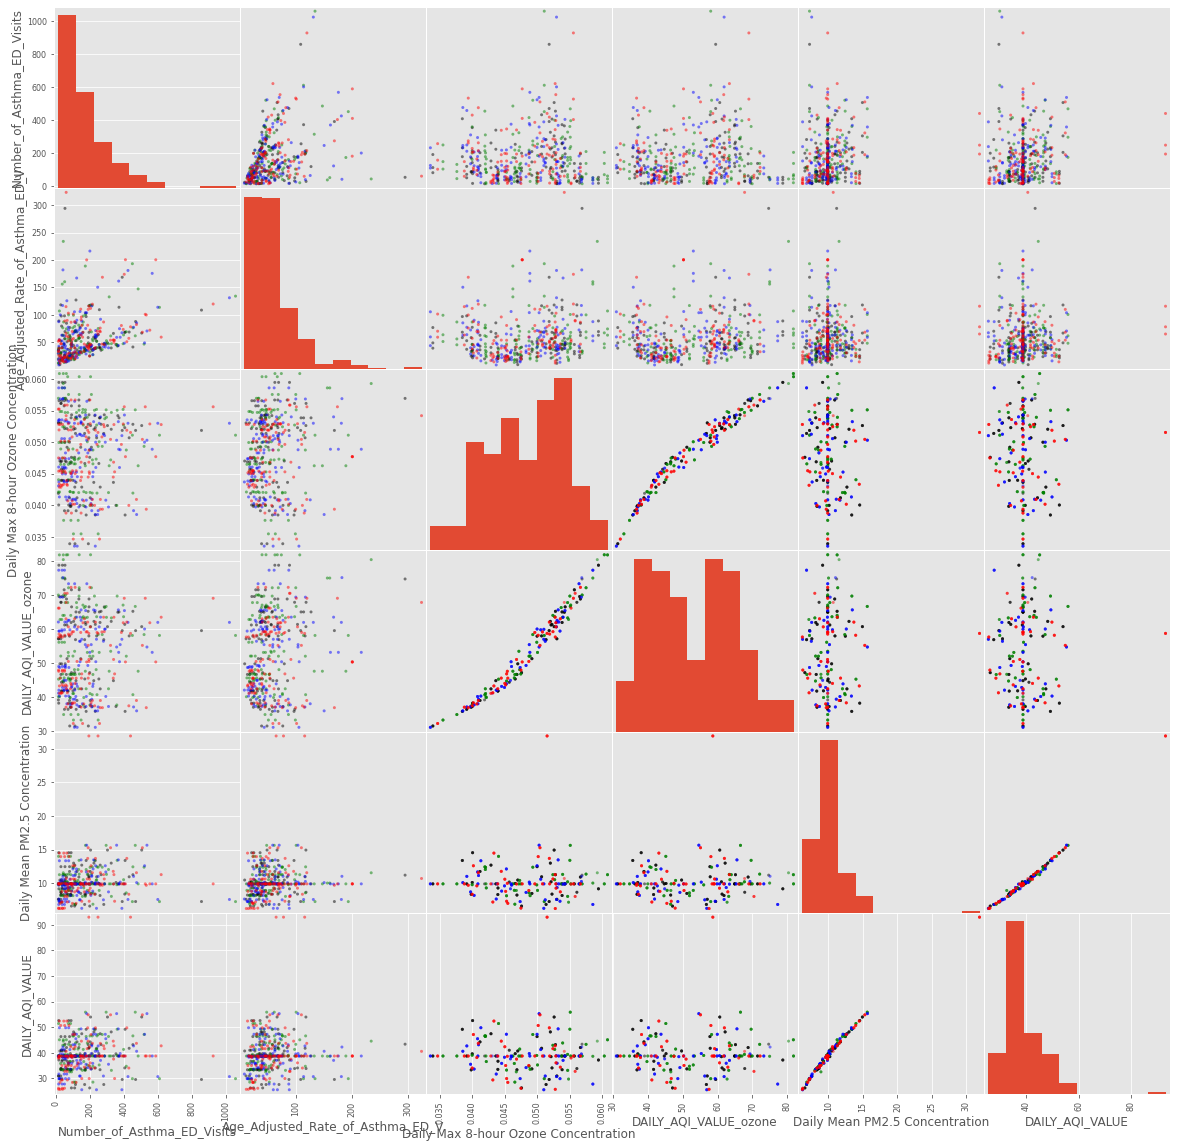

In [76]:
# didn't change lots if fill in NaN values
colors = airasthma["Year"].map({2015: 'red', 2016: 'blue', 2017: 'green', 2018:'black'})
data = airasthma[['Number_of_Asthma_ED_Visits', 'Age_Adjusted_Rate_of_Asthma_ED_V', 
                                      'Daily Max 8-hour Ozone Concentration', 
                                      'DAILY_AQI_VALUE_ozone', 'Daily Mean PM2.5 Concentration', 'DAILY_AQI_VALUE']]

pd.plotting.scatter_matrix(data, figsize=(20,20), diagonal='hist', color=colors)
plt.show()